<a href="https://colab.research.google.com/github/Rushinalawade/Zomato-Restaurants-Clustering-and-recommendation/blob/main/Zomato_Restaurants_Clustering_and_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic** : Unsupervised Learning

**Team Member** : Rushikesh Nalawade

<h2>Project Summary

Zomato is an Indian restaurant aggregator and food delivery start up. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in selected cities.

Restaurant busniess in India is always evolving. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So,this project focuses on analysing the Zomato restaurant data for each city in India. The Anlysis also solves some of the busniess cases that can directly help the customers finding the best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in. Also the metadata od reviewers can be used for identifying the critics in the industry.

<h2> Problem Statement

We have to analyze the sentiments of the reviews given by the customer in the data and make some useful conculsions in the form of Visualizations. Also,cluster the zomato resturants into different segments and visualized the data as it becomes easy to analyse data at instant

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

In [ ]:
df_review = pd.read_csv('/content/drive/MyDrive/Almabetter/Notebook/Zomato Restaurant reviews.csv')
df_metadata = pd.read_csv('/content/drive/MyDrive/Almabetter/Notebook/Zomato Restaurant names and Metadata.csv')

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df_review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
df_metadata.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gachibowli,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gachibowli,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-hotel-restaurant-gachibowli,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Beverages",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon-brew-company-gachibowli,"1,200","Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest","Asian, Continental, North Indian, Chinese, Mediterranean","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)"


In [ ]:
#Dataset shape:
print(f'df_metadata shape :{df_metadata.shape}')
print(f'df_review shape :{df_review.shape}')


df_metadata shape :(105, 6)
df_review shape :(10000, 7)


In [ ]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
#dataset null values:
df_metadata.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
df_review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

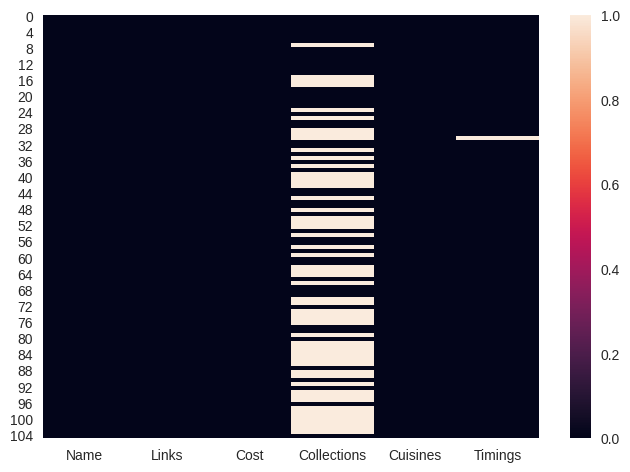

In [ ]:
#Visualizing the null values:
sns.heatmap(df_metadata.isnull())

<Axes: >

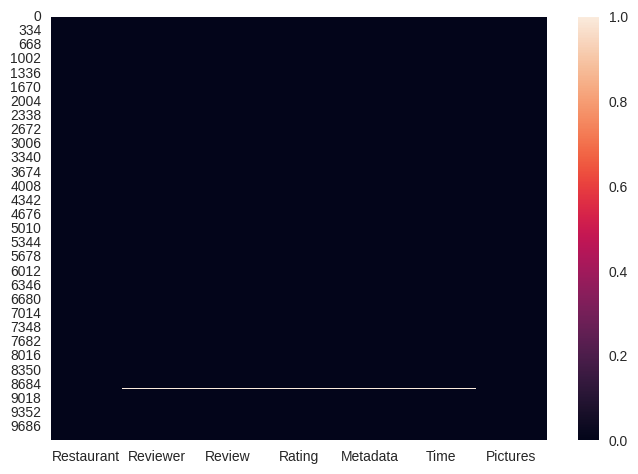

In [ ]:
sns.heatmap(df_review.isnull())

In [ ]:
#Duplicated Values:
df_metadata.duplicated().sum()

0

In [ ]:
df_review.duplicated().sum()

36

In [ ]:
#Handling missing values:
df_metadata.drop(columns={'Collections'},inplace=True)    #Since more than 50% of data is missing
df_metadata.drop(columns={'Timings'},inplace=True)        # We don't need this column

In [ ]:
df_metadata.dropna(inplace=True)
df_review.dropna(inplace=True)

In [ ]:
#Unique values in dataset:
col1 = df_metadata.columns
col2 = df_review.columns
for col in col1:
  value = df_metadata[col].nunique()
  print(f'The {col} has {value} unique value')
print('---'*40)
for col in col2:
  value = df_review[col].nunique()
  print(f'The {col} has {value} unique value')

The Name has 105 unique value
The Links has 105 unique value
The Cost has 29 unique value
The Cuisines has 92 unique value
------------------------------------------------------------------------------------------------------------------------
The Restaurant has 100 unique value
The Reviewer has 7442 unique value
The Review has 9364 unique value
The Rating has 10 unique value
The Metadata has 2477 unique value
The Time has 9775 unique value
The Pictures has 36 unique value


<h2> Prepare the Data

In [ ]:
df_metadata.head()

,Name,Links,Cost,Cuisines
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Chinese, Continental, Kebab, European, South Indian, North Indian"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gachibowli,800,"Biryani, North Indian, Chinese"
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gachibowli,"1,300","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-hotel-restaurant-gachibowli,800,"Biryani, North Indian, Chinese, Seafood, Beverages"
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon-brew-company-gachibowli,"1,200","Asian, Continental, North Indian, Chinese, Mediterranean"


In [ ]:
df_metadata.drop('Links',axis=1,inplace=True)

In [ ]:
# OneHotEncoding for Cuisines column:
cui_list = []
for index,row in df_metadata.iterrows():
  cui_list = cui_list + row['Cuisines'].split(', ')

unqiue_cui_list = set(cui_list)
for i in unqiue_cui_list:
  df_metadata[i] = 0

for index,row in df_metadata.iterrows():
  list_=row['Cuisines'].split(', ')
  for i in list_:
    df_metadata.loc[index,i] = 1

In [ ]:
df_metadata['Cost'] = df_metadata['Cost'].apply(lambda x: int(str(x.replace(',',''))))

In [ ]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           105 non-null    object
 1   Cost           105 non-null    int64 
 2   Cuisines       105 non-null    object
 3   Ice Cream      105 non-null    int64 
 4   Mediterranean  105 non-null    int64 
 5   North Indian   105 non-null    int64 
 6   Biryani        105 non-null    int64 
 7   Mughlai        105 non-null    int64 
 8   Goan           105 non-null    int64 
 9   Street Food    105 non-null    int64 
 10  North Eastern  105 non-null    int64 
 11  Chinese        105 non-null    int64 
 12  Finger Food    105 non-null    int64 
 13  Modern Indian  105 non-null    int64 
 14  European       105 non-null    int64 
 15  Pizza          105 non-null    int64 
 16  Mexican        105 non-null    int64 
 17  Mithai         105 non-null    int64 
 18  Japanese       105 non-null   

In [ ]:
df_metadata.drop('Cuisines',axis=1,inplace=True)
df_metadata.head()

,Name,Cost,Ice Cream,Mediterranean,North Indian,Biryani,Mughlai,Goan,Street Food,North Eastern,...,Momos,Thai,Andhra,Asian,Beverages,Italian,Spanish,American,Juices,Bakery
0,Beyond Flavours,800,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Paradise,800,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Flechazo,1300,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Over The Moon Brew Company,1200,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Text(0.5, 1.0, 'Cost Distribution')

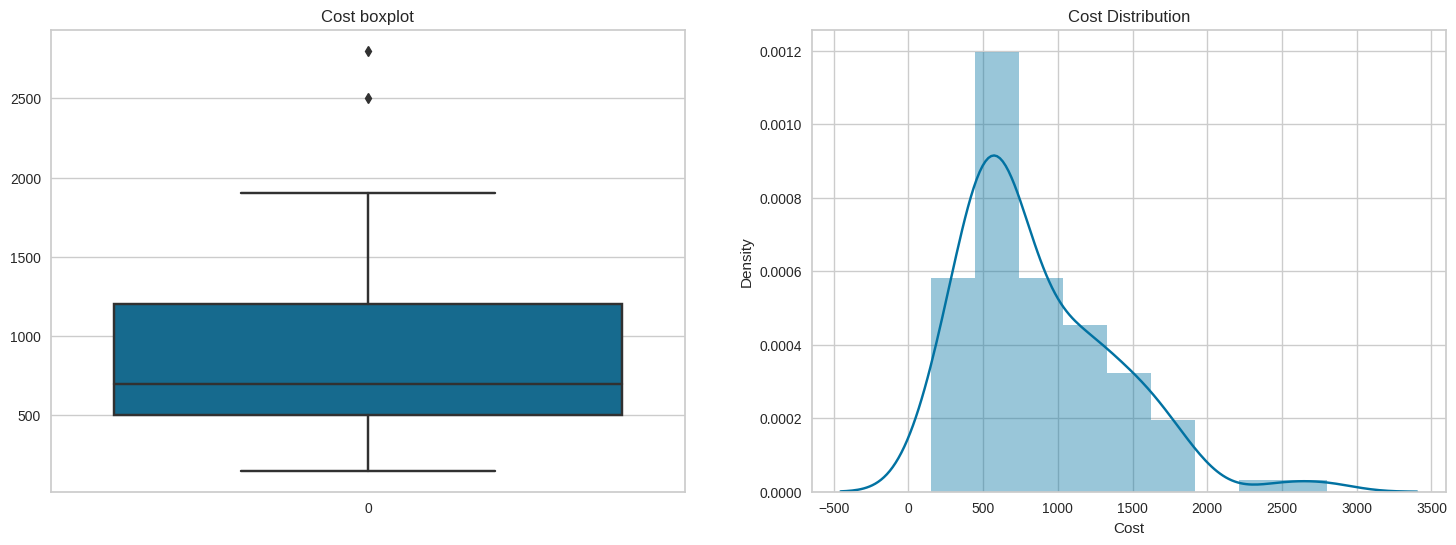

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
sns.boxplot(df_metadata['Cost'],ax=ax1)
sns.distplot(df_metadata['Cost'],ax=ax2)
ax1.set_title('Cost boxplot')
ax2.set_title('Cost Distribution')

In [ ]:
df_metadata['Cost'].describe()

count     105.000000
mean      861.428571
std       510.149730
min       150.000000
25%       500.000000
50%       700.000000
75%      1200.000000
max      2800.000000
Name: Cost, dtype: float64

In [ ]:
df_metadata['Cost'] = df_metadata['Cost'].apply(lambda x : 1965 if x > 1965 else x)

In [ ]:
df_review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
#Splitting the Metadata column:
df_review[['Reviews','Followers']] = df_review.Metadata.str.split(',',expand=True)

In [ ]:
def get_number(text):
  lis=[]
  if text is not None:
    for i in text:
      if i in ['1','2','3','4','5','6','7','8','9','0']:
        lis.append(i)
  if(len(lis)>0):
    return int(''.join(lis))
  else:
    return 0

In [ ]:
df_review['Reviews'] = df_review['Reviews'].apply(lambda x : get_number(x))
df_review['Followers'] = df_review['Followers'].apply(lambda x:get_number(x))

In [ ]:
#Converting Rating column to int:
df_review.loc[7601,'Rating'] = 4
df_review['Rating'] = df_review['Rating'].astype(float)

<h2> Lets do some Visualization:

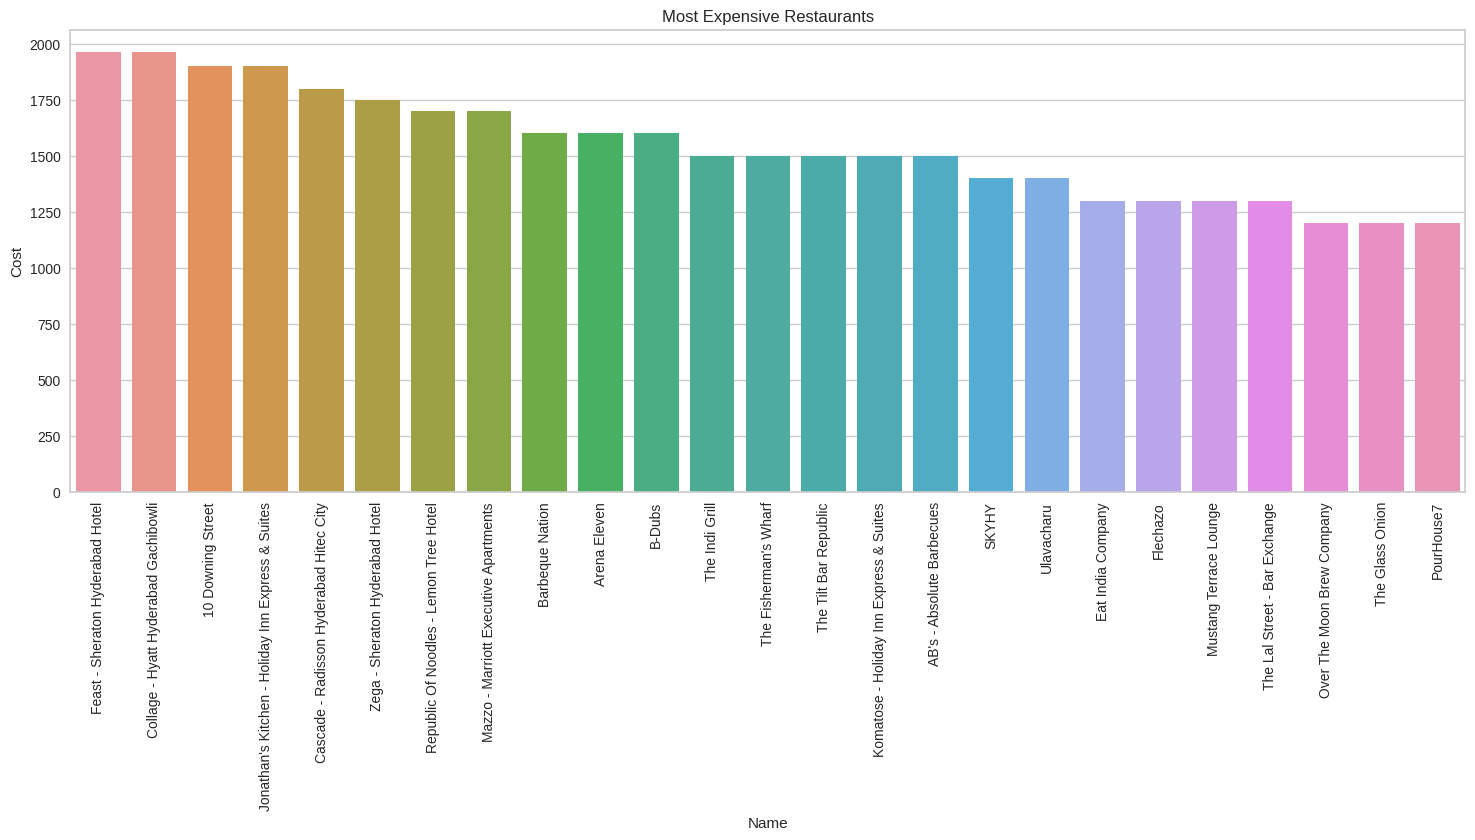

In [ ]:
#Lets find costlier Restaurant:
plt.figure(figsize=(18,6))
df = df_metadata.groupby('Name')['Cost'].agg('mean').to_frame().sort_values(by='Cost',ascending=False).reset_index().head(25)
sns.barplot(data=df, x='Name',y='Cost')
plt.xticks(rotation=90)
plt.title('Most Expensive Restaurants')
plt.show()

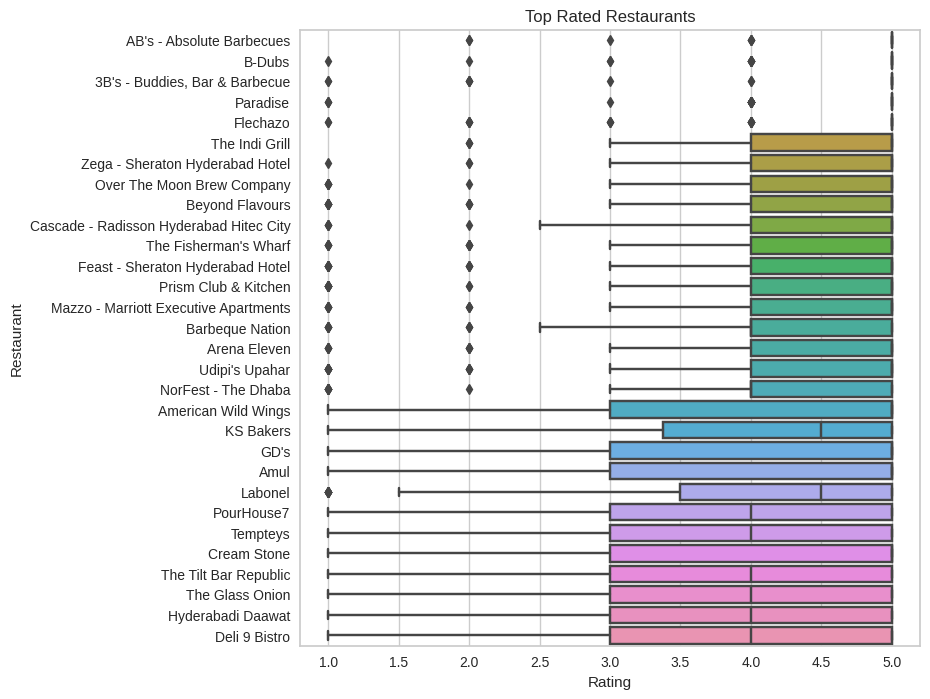

In [ ]:
#Restaurants rating:
plt.figure(figsize=(8,8))
df = df_review.groupby('Restaurant')['Rating'].agg('mean').to_frame().sort_values(by='Rating',ascending=False).reset_index().head(30)
restlist = list(df.Restaurant)
df = pd.DataFrame()
for i in restlist:
  df1 = df_review.loc[df_review['Restaurant']==i]
  df = pd.concat([df,df1],axis=0)
sns.boxplot(data=df,x='Rating',y='Restaurant')
plt.title('Top Rated Restaurants')
plt.show()

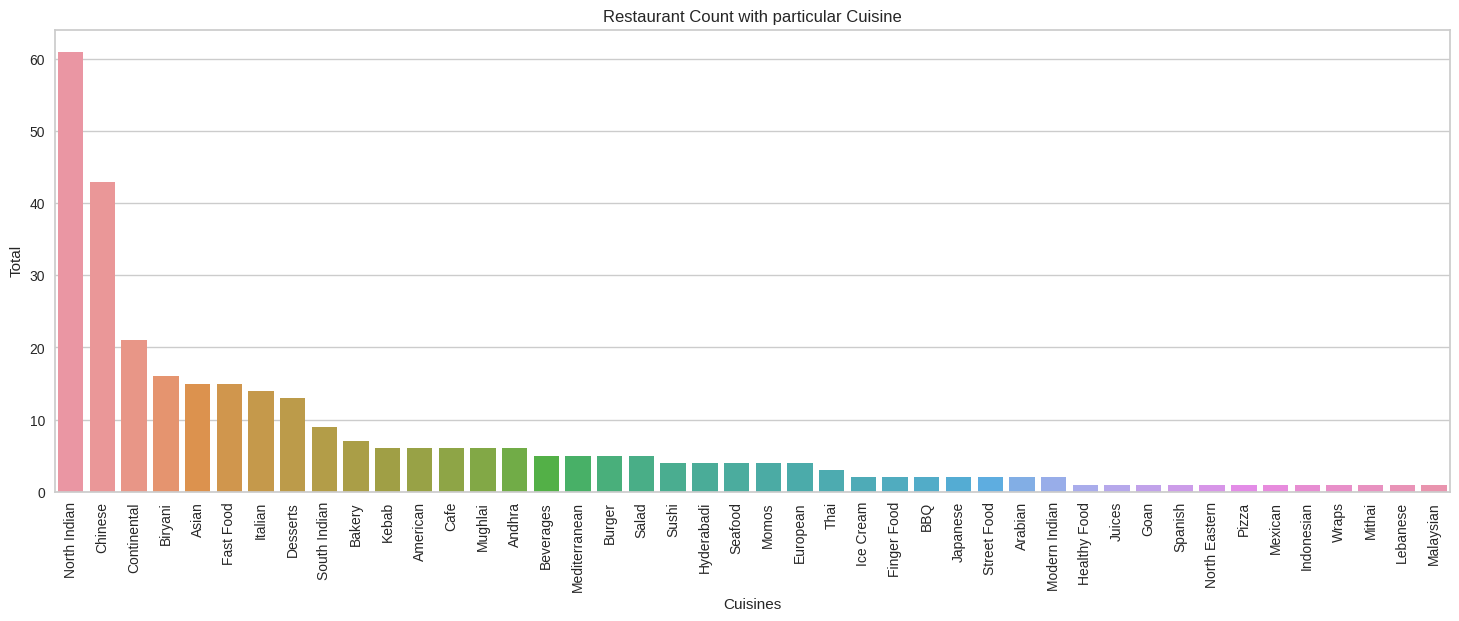

In [ ]:
#Lets see some cuisines:
plt.figure(figsize=(18,6))
df = pd.DataFrame(set(cui_list),columns=['Cuisines'])
df['Total'] = df['Cuisines'].apply(lambda x: df_metadata[x].sum())
df = df.sort_values(by='Total',ascending=False)
sns.barplot(data=df,x='Cuisines',y='Total')
plt.xticks(rotation=90)
plt.title('Restaurant Count with particular Cuisine')
plt.show()

In [ ]:
# Merging two datasets:
df_new1 = df_review.groupby('Restaurant')[['Rating','Pictures','Reviews','Followers']].agg({'Rating':'mean','Pictures':'sum','Reviews':'sum','Followers':'sum'}).reset_index()
df_new = pd.merge(df_metadata,df_new1,how='inner',left_on='Name',right_on='Restaurant')
df_new.head()

,Name,Cost,Ice Cream,Mediterranean,North Indian,Biryani,Mughlai,Goan,Street Food,North Eastern,...,Italian,Spanish,American,Juices,Bakery,Restaurant,Rating,Pictures,Reviews,Followers
0,Beyond Flavours,800,0,0,1,0,0,0,0,0,...,0,0,0,0,0,Beyond Flavours,4.28,39,752,10061
1,Paradise,800,0,0,1,1,0,0,0,0,...,0,0,0,0,0,Paradise,4.70,2,252,798
2,Flechazo,1300,0,1,1,0,0,0,0,0,...,0,0,0,0,0,Flechazo,4.66,55,667,2748
3,Shah Ghouse Hotel & Restaurant,800,0,0,1,1,0,0,0,0,...,0,0,0,0,0,Shah Ghouse Hotel & Restaurant,3.21,30,1433,11843
4,Over The Moon Brew Company,1200,0,1,1,0,0,0,0,0,...,0,0,0,0,0,Over The Moon Brew Company,4.34,44,1831,7010


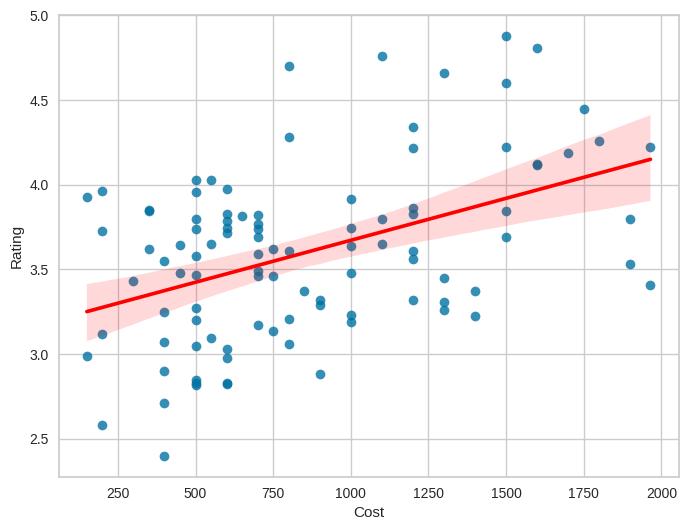

In [ ]:
#Lets see relation between cost and rating:
plt.figure(figsize=(8,6))
sns.regplot(data=df_new,x='Cost',y='Rating',line_kws={'color':'red'})
plt.show()

In [ ]:
df_new['Cost'].corr(df_new['Rating'])

0.452737050528384

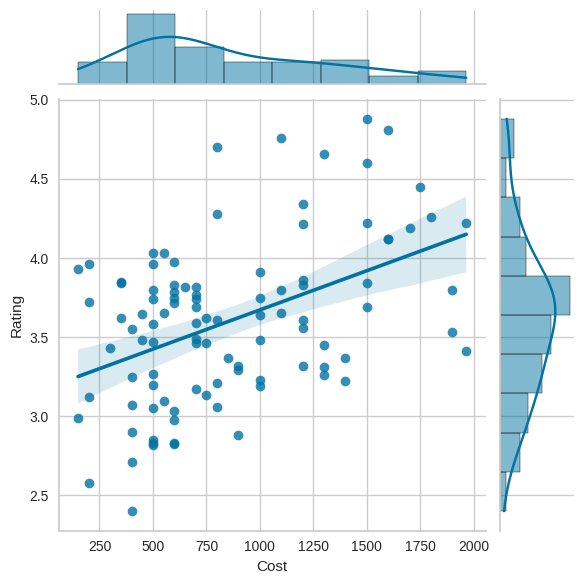

In [ ]:
# Relation between Cost and Rating
sns.jointplot(data=df_new,x='Cost',y='Rating',kind='reg')

<Axes: xlabel='Reviews', ylabel='Density'>

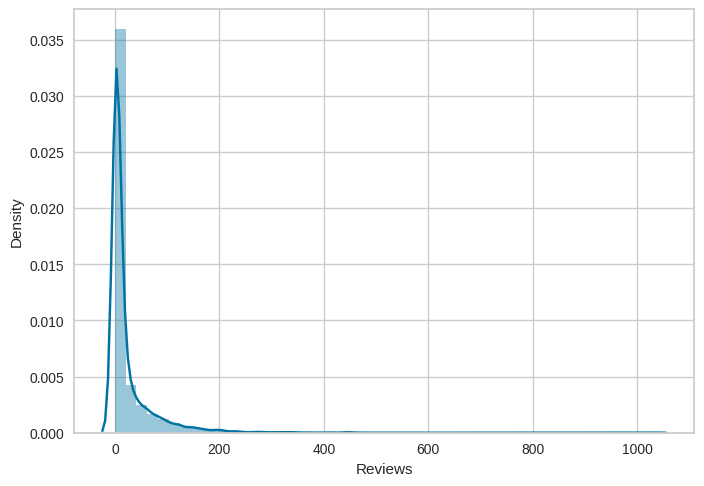

In [ ]:
sns.distplot(df_review['Reviews'])

In [ ]:
# Let us consider Reviewer as Food Critic who has Review more than 100.
df = df_review[df_review['Reviews']>=100]
df = df.groupby('Reviewer')['Reviews','Followers'].agg('mean').sort_values(by='Reviews',ascending=False).reset_index()
df.head(10)

,Reviewer,Reviews,Followers
0,Anvesh Chowdary,1031.0,1654.0
1,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685.0,794.0
2,Abc098,665.0,2275.0
3,Mithun Ravindranathan,560.0,2863.0
4,Mohd Zubair Ali (Hyderabad.Food.Diaries),482.0,1688.0
5,Bhargava Krishna,472.0,1302.0
6,Epicurean Tales,452.0,2464.0
7,Raghu,443.0,1016.0
8,Aarti Kamath,417.0,5451.0
9,Shrishail Deshnur,414.0,1047.0


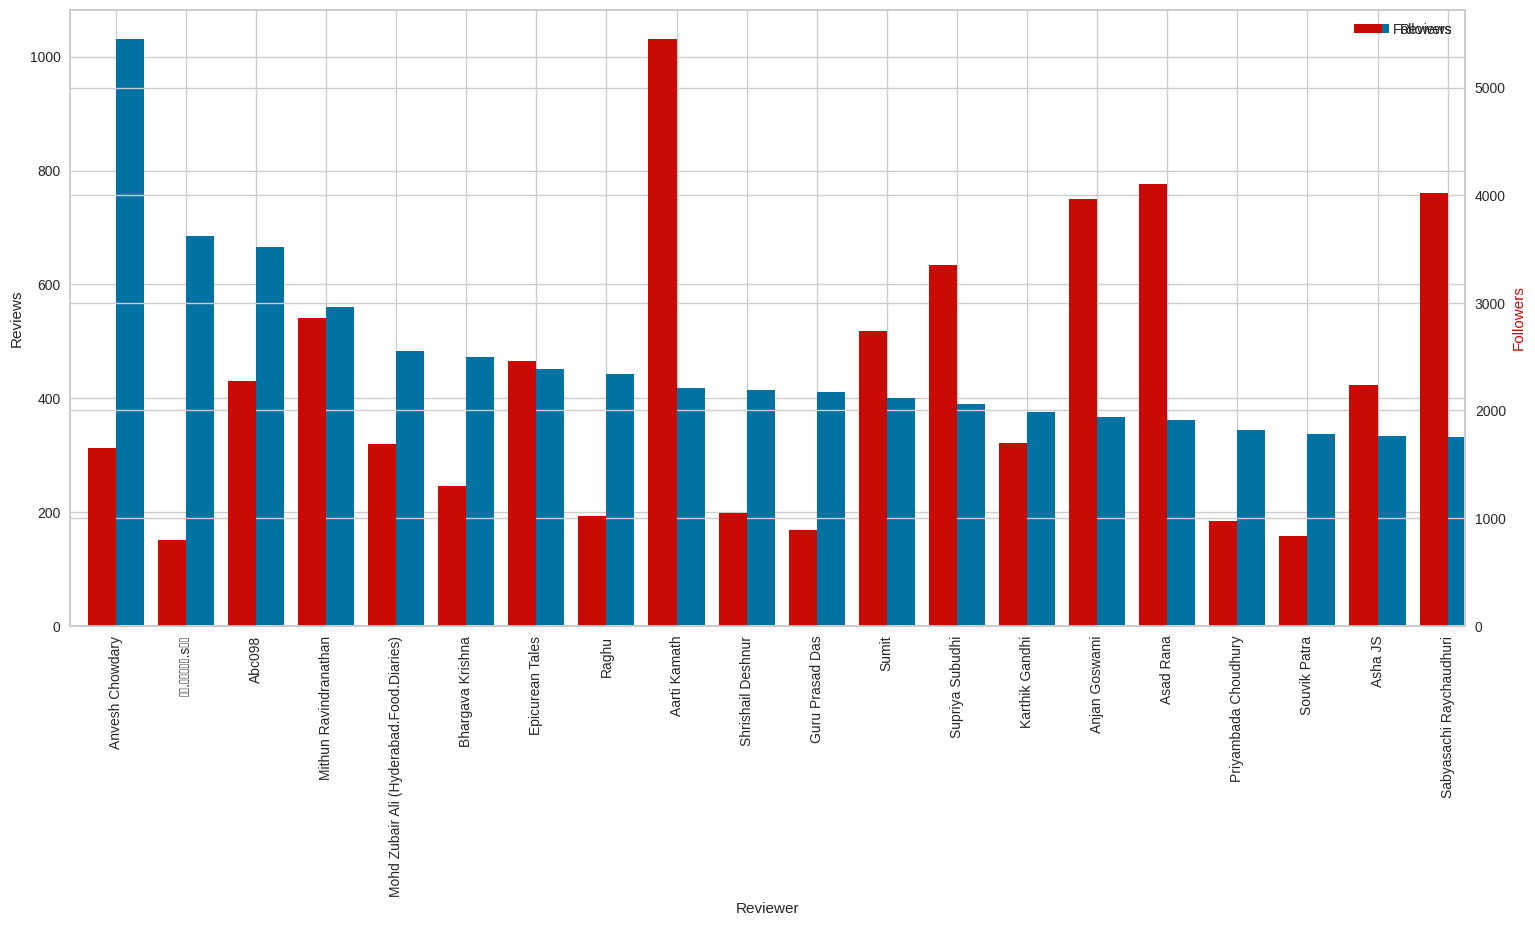

In [ ]:
fig,ax = plt.subplots(figsize=(18,8))
ax1 = ax.twinx()
df.head(20).plot(kind='bar',x='Reviewer',y='Reviews',ax=ax,position=0,width=0.4)
df.head(20).plot(kind='bar',x='Reviewer',y='Followers',ax=ax1,position=1,width=0.4,color='r')
plt.xlabel('Reviewer')
ax.set_ylabel('Reviews')
ax1.set_ylabel('Followers',color='r')
# plt.legend(['Followers','Reviews'],loc=1)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Lets rate the review:
def get_sentiment(rating):
  if(rating>=4):
    return 'Positive'
  elif(rating>2):
    return 'Neutral'
  else:
    return 'Negative'

df_review['Sentiment'] = df_review['Rating'].apply(get_sentiment)

In [ ]:
df_sentiment = pd.DataFrame(columns=['Restaurant','Positive_rate','Negative_rate','Neutral_rate'])

In [ ]:
restaurant_list = list(df_review['Restaurant'].unique())

In [ ]:
for name in restaurant_list:
  df = df_review[df_review['Restaurant']==name]
  df1 = df['Sentiment'].value_counts().to_frame()
  positive_rate = round((df1.loc['Positive','Sentiment']/len(df))*100,2)
  negative_rate = round((df1.loc['Negative','Sentiment']/len(df))*100,2)
  neutral_rate = round((df1.loc['Neutral','Sentiment']/len(df))*100,2)
  df2 = {'Restaurant': name, 'Positive_rate': positive_rate, 'Negative_rate': negative_rate, 'Neutral_rate': neutral_rate}
  df_sentiment = df_sentiment.append(df2,ignore_index=True)
df_sentiment

,Restaurant,Positive_rate,Negative_rate,Neutral_rate
0,Beyond Flavours,82.0,12.0,6.0
1,Paradise,96.0,3.0,1.0
2,Flechazo,91.0,6.0,3.0
3,Shah Ghouse Hotel & Restaurant,53.0,35.0,12.0
4,Over The Moon Brew Company,87.0,7.0,6.0
...,...,...,...,...
95,Desi Bytes,42.0,43.0,15.0
96,Hyderabadi Daawat,74.0,19.0,7.0
97,Zega - Sheraton Hyderabad Hotel,89.0,3.0,8.0
98,Triptify,63.0,28.0,9.0


In [ ]:
df_new.head()

,Name,Cost,Ice Cream,Mediterranean,North Indian,Biryani,Mughlai,Goan,Street Food,North Eastern,...,Italian,Spanish,American,Juices,Bakery,Restaurant,Rating,Pictures,Reviews,Followers
0,Beyond Flavours,800,0,0,1,0,0,0,0,0,...,0,0,0,0,0,Beyond Flavours,4.28,39,752,10061
1,Paradise,800,0,0,1,1,0,0,0,0,...,0,0,0,0,0,Paradise,4.70,2,252,798
2,Flechazo,1300,0,1,1,0,0,0,0,0,...,0,0,0,0,0,Flechazo,4.66,55,667,2748
3,Shah Ghouse Hotel & Restaurant,800,0,0,1,1,0,0,0,0,...,0,0,0,0,0,Shah Ghouse Hotel & Restaurant,3.21,30,1433,11843
4,Over The Moon Brew Company,1200,0,1,1,0,0,0,0,0,...,0,0,0,0,0,Over The Moon Brew Company,4.34,44,1831,7010


In [ ]:
df_new = pd.merge(left=df_new,right=df_sentiment,how='inner',left_on='Name',right_on='Restaurant')

In [ ]:
df_new.head()

,Name,Cost,Ice Cream,Mediterranean,North Indian,Biryani,Mughlai,Goan,Street Food,North Eastern,...,Bakery,Restaurant_x,Rating,Pictures,Reviews,Followers,Restaurant_y,Positive_rate,Negative_rate,Neutral_rate
0,Beyond Flavours,800,0,0,1,0,0,0,0,0,...,0,Beyond Flavours,4.28,39,752,10061,Beyond Flavours,82.0,12.0,6.0
1,Paradise,800,0,0,1,1,0,0,0,0,...,0,Paradise,4.70,2,252,798,Paradise,96.0,3.0,1.0
2,Flechazo,1300,0,1,1,0,0,0,0,0,...,0,Flechazo,4.66,55,667,2748,Flechazo,91.0,6.0,3.0
3,Shah Ghouse Hotel & Restaurant,800,0,0,1,1,0,0,0,0,...,0,Shah Ghouse Hotel & Restaurant,3.21,30,1433,11843,Shah Ghouse Hotel & Restaurant,53.0,35.0,12.0
4,Over The Moon Brew Company,1200,0,1,1,0,0,0,0,0,...,0,Over The Moon Brew Company,4.34,44,1831,7010,Over The Moon Brew Company,87.0,7.0,6.0


In [ ]:
#Removing the unnecessary columns:
df_new1 = df_new.drop(columns=['Restaurant_x','Restaurant_y'])
df_new1.head()

,Name,Cost,Ice Cream,Mediterranean,North Indian,Biryani,Mughlai,Goan,Street Food,North Eastern,...,American,Juices,Bakery,Rating,Pictures,Reviews,Followers,Positive_rate,Negative_rate,Neutral_rate
0,Beyond Flavours,800,0,0,1,0,0,0,0,0,...,0,0,0,4.28,39,752,10061,82.0,12.0,6.0
1,Paradise,800,0,0,1,1,0,0,0,0,...,0,0,0,4.70,2,252,798,96.0,3.0,1.0
2,Flechazo,1300,0,1,1,0,0,0,0,0,...,0,0,0,4.66,55,667,2748,91.0,6.0,3.0
3,Shah Ghouse Hotel & Restaurant,800,0,0,1,1,0,0,0,0,...,0,0,0,3.21,30,1433,11843,53.0,35.0,12.0
4,Over The Moon Brew Company,1200,0,1,1,0,0,0,0,0,...,0,0,0,4.34,44,1831,7010,87.0,7.0,6.0


In [ ]:
# sns.pairplot(df_new1[['Cost','Rating','Positive_rate','Negative_rate','Reviews']])

In [ ]:
# col_list = ['Positive_rate','Negative_rate','Neutral_rate','Rating','Reviews']
# for col in col_list:
#   fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
#   sns.boxplot(df_new1[col],ax=ax1)
#   sns.distplot(df_new1[col],ax=ax2)
#   ax1.set_title(f'{col} Boxplot')
#   ax2.set_title(f'{col} Distribution')

In [ ]:
df_new1.drop(columns={'Pictures','Followers'},inplace=True)

In [ ]:
df_new1.head()

,Name,Cost,Ice Cream,Mediterranean,North Indian,Biryani,Mughlai,Goan,Street Food,North Eastern,...,Spanish,American,Juices,Bakery,Rating,Reviews,Positive_rate,Negative_rate,Neutral_rate,labels
0,Beyond Flavours,800,0,0,1,0,0,0,0,0,...,0,0,0,0,4.28,752,82.0,12.0,6.0,1
1,Paradise,800,0,0,1,1,0,0,0,0,...,0,0,0,0,4.70,252,96.0,3.0,1.0,1
2,Flechazo,1300,0,1,1,0,0,0,0,0,...,0,0,0,0,4.66,667,91.0,6.0,3.0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,1,1,0,0,0,0,...,0,0,0,0,3.21,1433,53.0,35.0,12.0,1
4,Over The Moon Brew Company,1200,0,1,1,0,0,0,0,0,...,0,0,0,0,4.34,1831,87.0,7.0,6.0,0


In [ ]:
# !pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=e196dc215c2c119ab3014cf5f37af95395dabcf17ed68f9c02a63a523b93e61b
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=01f39c723e40b31a54cdda731d1099bf3a1c8345a4d60d0fb3f3227ba5b43dfb
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
df_new1 = df_new1.drop('Name',axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
df_scaled = StandardScaler().fit_transform(df_new1)

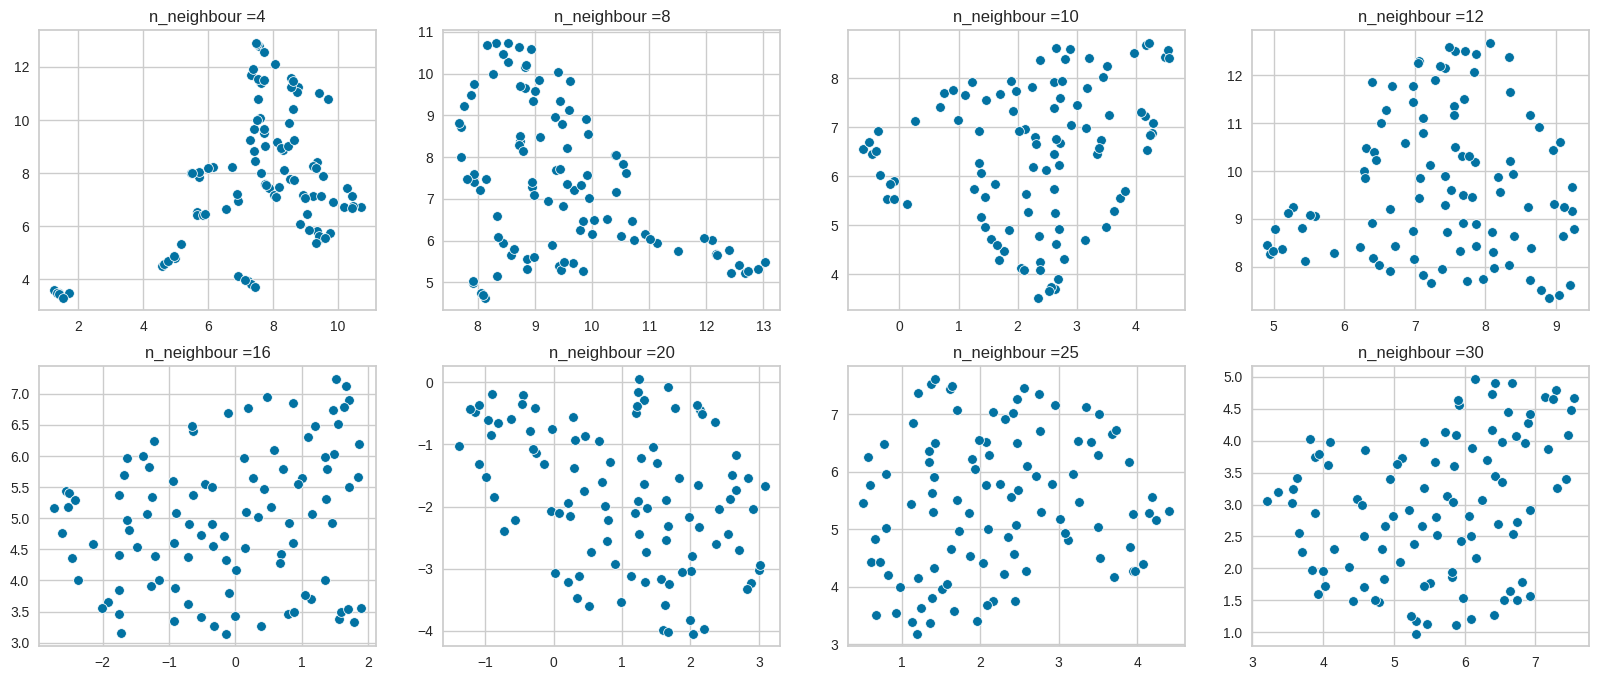

In [ ]:
from umap import UMAP
from sklearn.model_selection import GridSearchCV
fig,axs = plt.subplots(2,4,figsize=(20,8))
axs = axs.ravel()

n_neigbhour = [4,8,10,12,16,20,25,30]
for n in n_neigbhour:
  df_2d = UMAP(n_neighbors=n,random_state=116).fit_transform(df_scaled)
  sns.scatterplot(x=df_2d[:,0],y=df_2d[:,1],ax=axs[n_neigbhour.index(n)])
  axs[n_neigbhour.index(n)].set_title(f'n_neighbour ={n}')


In [ ]:
# lets take n_neighbour = 10
df_2d = UMAP(n_neighbors=10,random_state=116).fit_transform(df_scaled)

In [ ]:
# Checking Dataframe shape:
df_2d.shape

(100, 2)

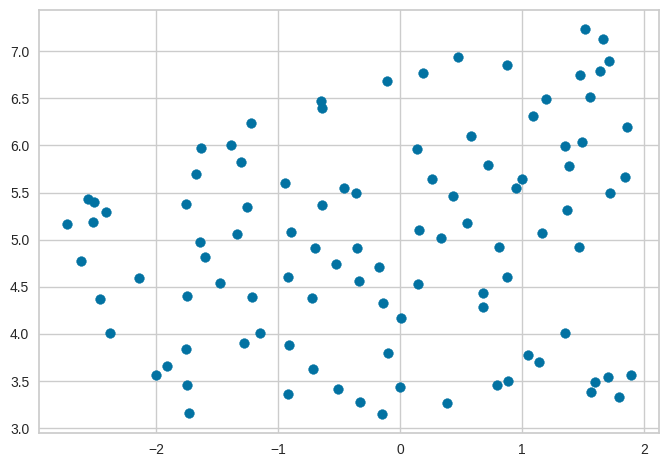

In [ ]:
# Plotting scatter plot for selected n_neighbour:
plt.scatter(df_2d[:,0],df_2d[:,1])

In [ ]:
# setting a new varible:
x_scaled = df_2d

<h2> K-Means Clustering:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# Iterating k and finding corresponding wcss and silhouette score
range_of_k = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
score_list=[]
sil_score_list = []
X_array = x_scaled
for k in range_of_k:
  kmean = KMeans(n_clusters=k,random_state=116)
  kmean.fit(X_array)
  score = kmean.inertia_
  cluster = kmean.predict(X_array)
  sil_score = silhouette_score(X_array,cluster)
  score_list.append(score)
  sil_score_list.append(sil_score)
  print(f'for n_cluster:{k} Score: {score} Silhouette_score:{sil_score}')

for n_cluster:2 Score: 200.4239959716797 Silhouette_score:0.4050391912460327
for n_cluster:3 Score: 112.28201293945312 Silhouette_score:0.45563721656799316
for n_cluster:4 Score: 83.61271667480469 Silhouette_score:0.4237797260284424
for n_cluster:5 Score: 65.01300811767578 Silhouette_score:0.4228402376174927
for n_cluster:6 Score: 51.341644287109375 Silhouette_score:0.4361284375190735
for n_cluster:7 Score: 41.43927001953125 Silhouette_score:0.4586378335952759
for n_cluster:8 Score: 34.02610778808594 Silhouette_score:0.43596789240837097
for n_cluster:9 Score: 27.754627227783203 Silhouette_score:0.4624537527561188
for n_cluster:10 Score: 24.222820281982422 Silhouette_score:0.45303627848625183
for n_cluster:11 Score: 21.229209899902344 Silhouette_score:0.43946728110313416
for n_cluster:12 Score: 18.49226188659668 Silhouette_score:0.47283709049224854
for n_cluster:13 Score: 16.45823097229004 Silhouette_score:0.44087448716163635
for n_cluster:14 Score: 14.152402877807617 Silhouette_score:0

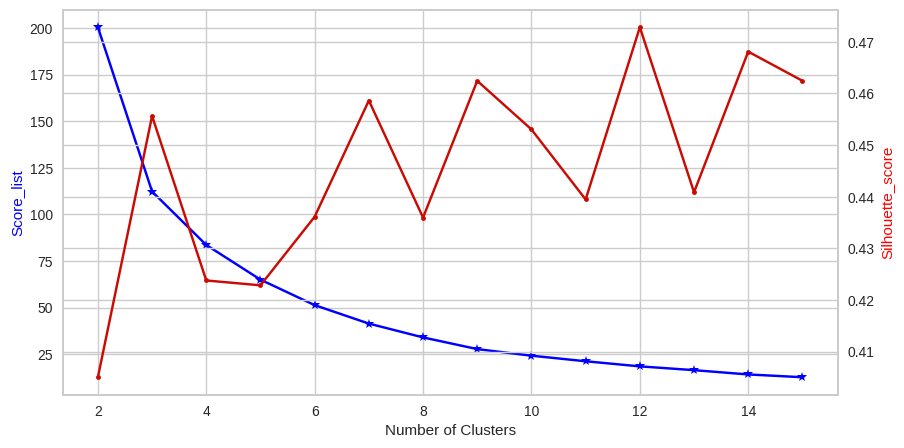

In [ ]:
fig,ax = plt.subplots(figsize = (10, 5))
ax1 = ax.twinx()
ax.plot(range(2,16),score_list,marker='*',color='blue')
ax1.plot(range(2,16),sil_score_list,marker='.',color='r')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Score_list',color='blue')
ax1.set_ylabel('Silhouette_score',color='red')
plt.show()

So according to silhouette score number of clusters is 3.

In [ ]:
# ! pip install yellowbrick

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=15, random_state=116),
                 k=(2, 16))

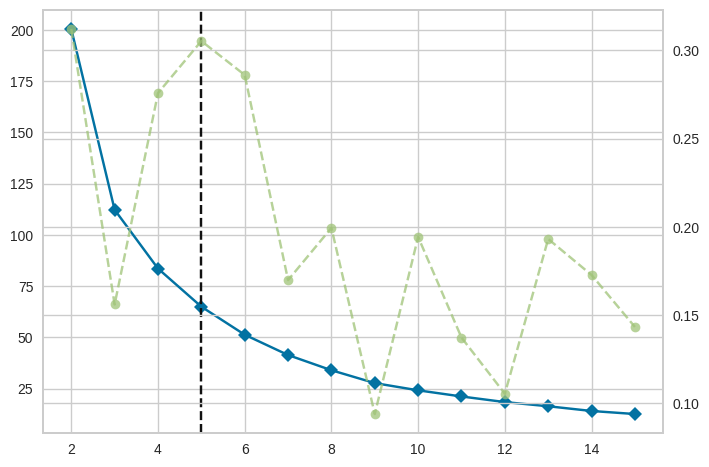

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# with metric as Distortion:
model = KMeans(random_state=116)
visualizer = KElbowVisualizer(model,k=(2,16),metric='distortion',timing=False,locate_elbow=True)
visualizer.fit(x_scaled)


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=15, random_state=116),
                 k=(2, 16), metric='silhouette')

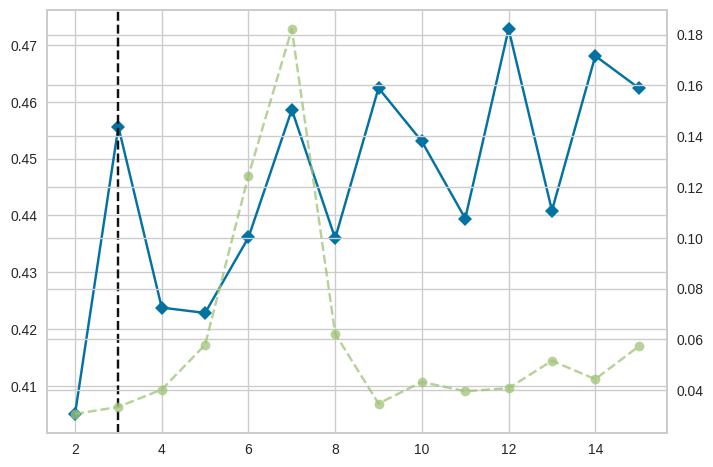

In [ ]:
# with metric as Silhouette:
model = KMeans(random_state=116)
visualizer = KElbowVisualizer(model,k=(2,16),metric='silhouette',timing=False,locate_elbow=True)
visualizer.fit(x_scaled)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=15, random_state=116),
                 k=(2, 16), metric='calinski_harabasz', timings=False)

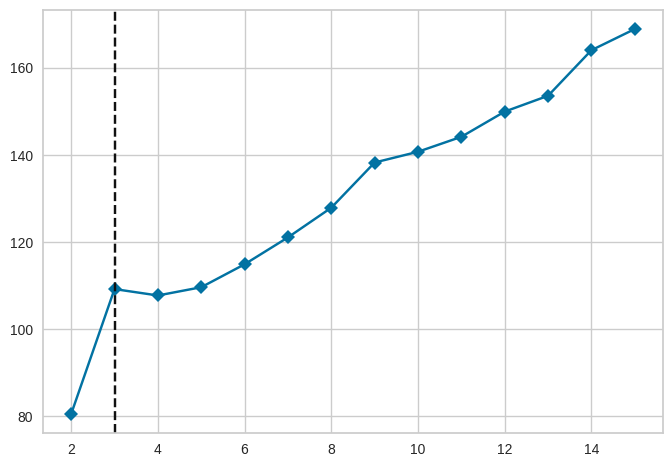

In [ ]:
# with metric as calinski_harabasz:
model = KMeans(random_state=116)
visualizer = KElbowVisualizer(model,k=(2,16),metric='calinski_harabasz',timings=False,locate_elbow=True)
visualizer.fit(x_scaled)


The graph suggest the number of clusters between 3 to 5.

In [ ]:
def get_score(X):
  range_n_clusters = [2,3,4,5,6,7]

  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=116)
      cluster_labels = clusterer.fit_predict(X)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(X, cluster_labels)
      print(
          "For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg,
      )

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(X, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(
              np.arange(y_lower, y_upper),
              0,
              ith_cluster_silhouette_values,
              facecolor=color,
              edgecolor=color,
              alpha=0.7,
          )

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(
          X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
      )

      # Labeling the clusters
      centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      ax2.scatter(
          centers[:, 0],
          centers[:, 1],
          marker="o",
          c="white",
          alpha=1,
          s=200,
          edgecolor="k",
      )

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(
          "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
          % n_clusters,
          fontsize=14,
          fontweight="bold",
      )


For n_clusters = 2 The average silhouette_score is : 0.4050392
For n_clusters = 3 The average silhouette_score is : 0.45563722
For n_clusters = 4 The average silhouette_score is : 0.3855644
For n_clusters = 5 The average silhouette_score is : 0.3961832
For n_clusters = 6 The average silhouette_score is : 0.41689372
For n_clusters = 7 The average silhouette_score is : 0.45863783


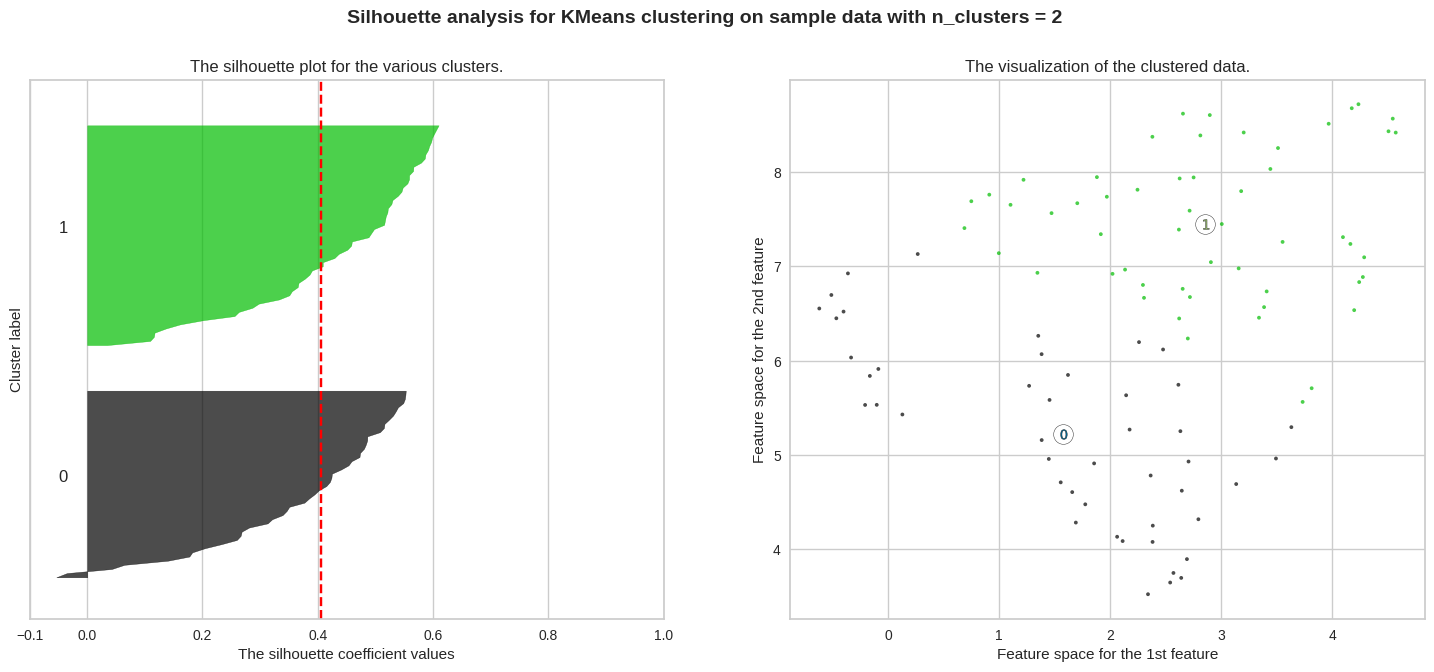

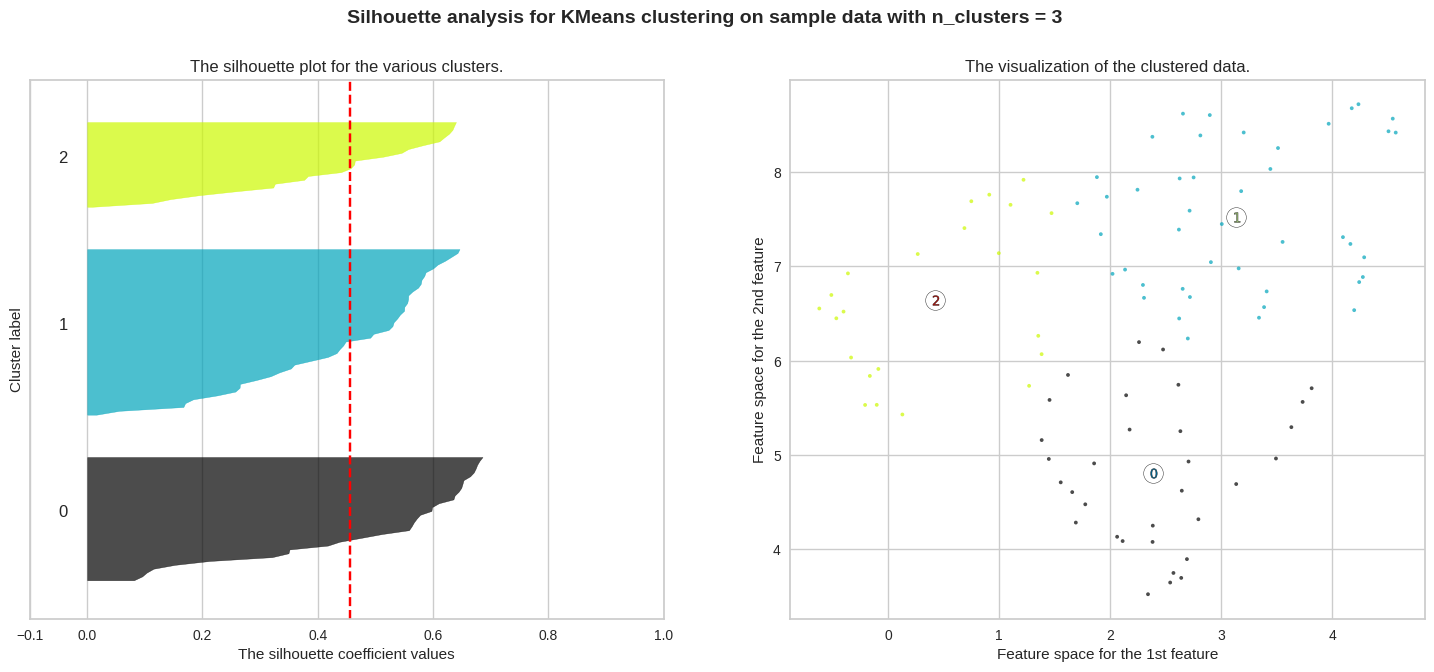

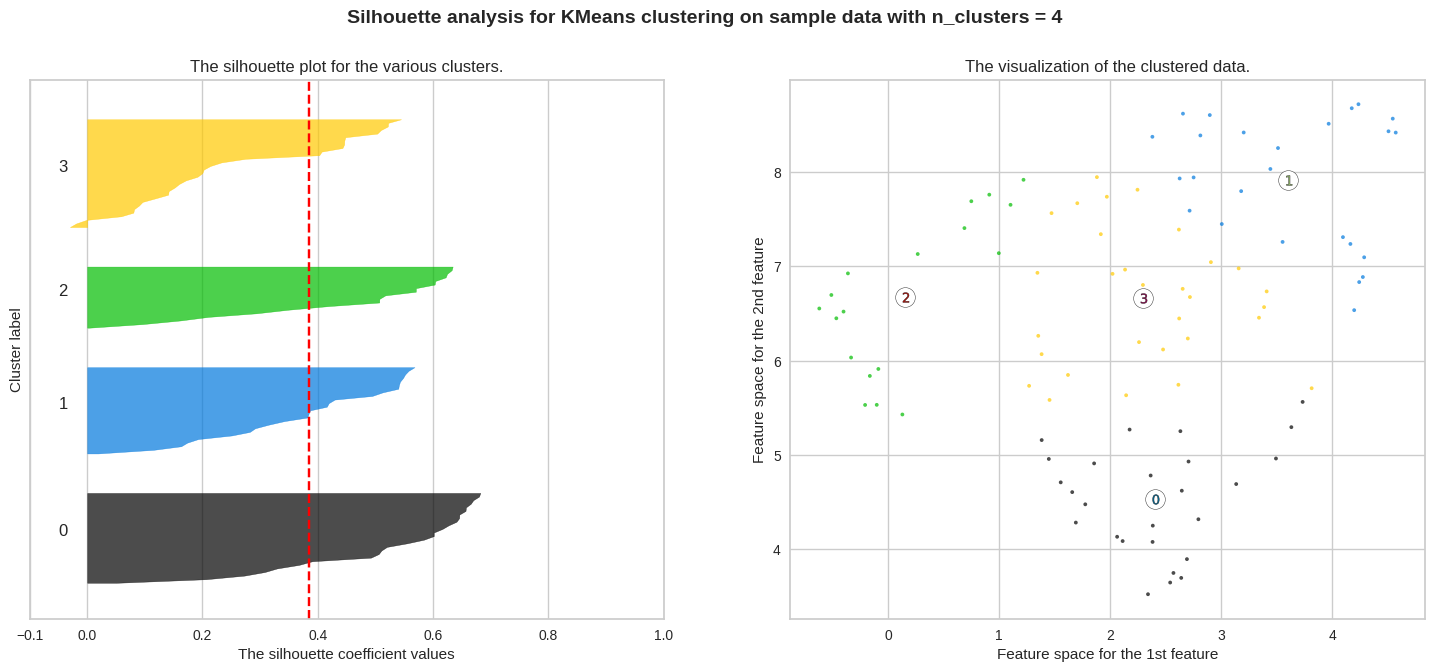

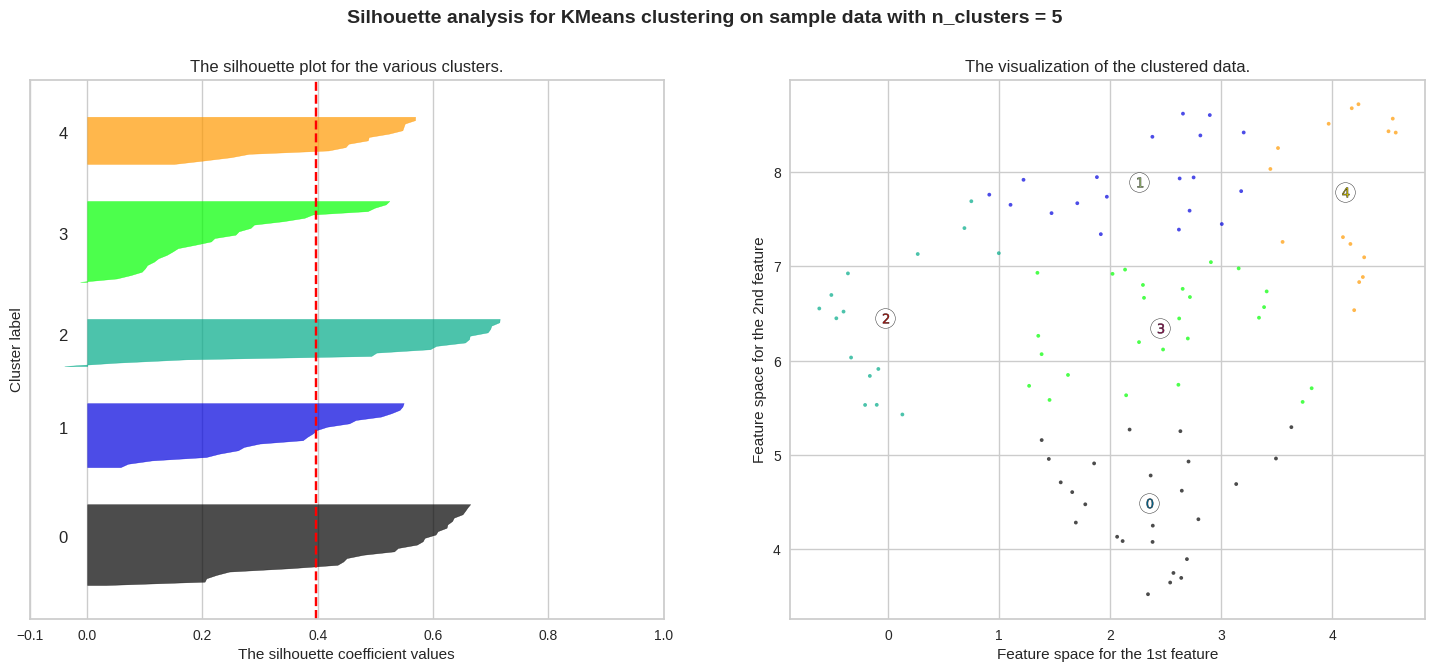

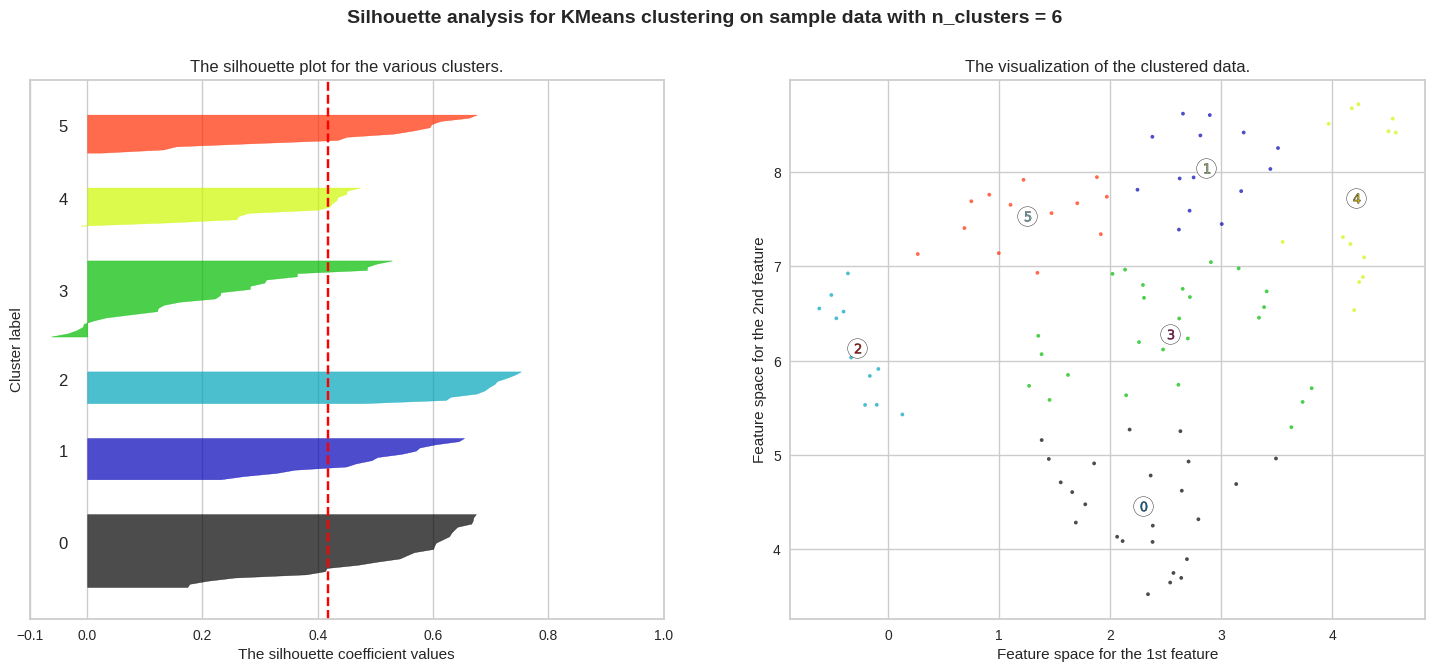

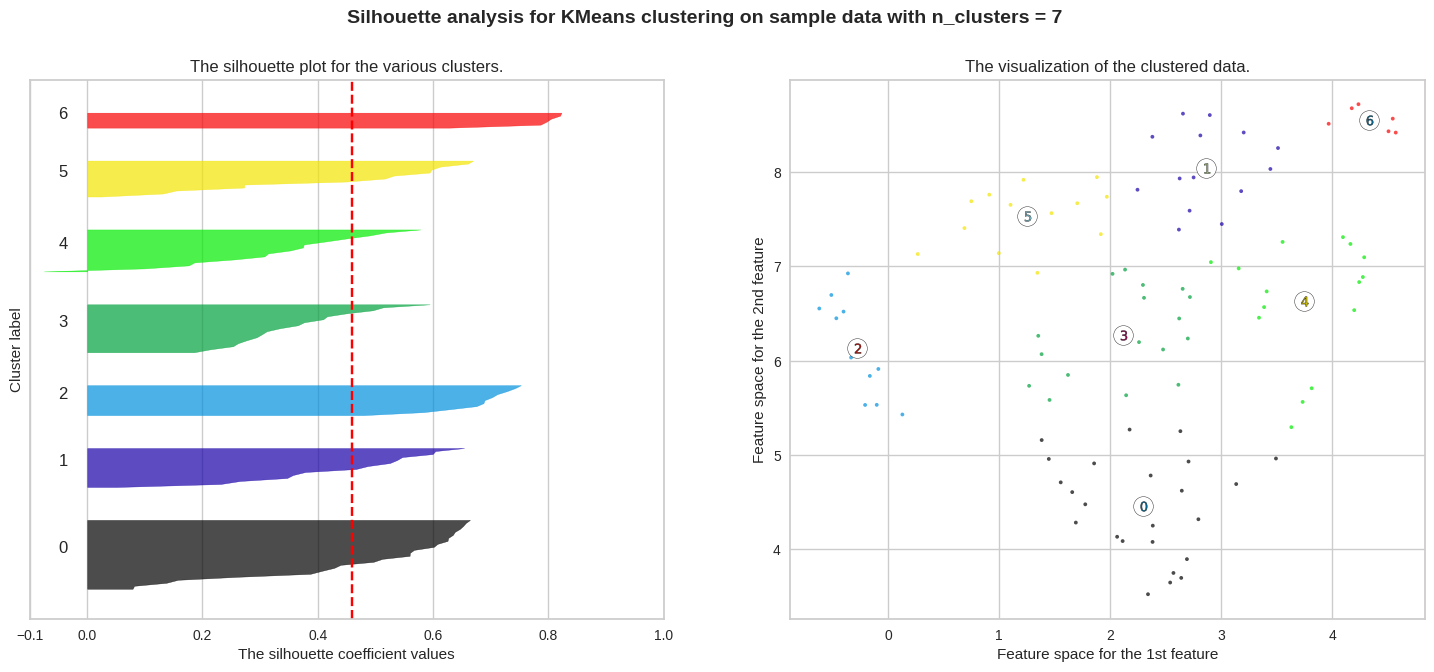

In [ ]:
get_score(x_scaled)

The distribution shows that n_cluster = 3 has no neagative values and has silhouette score of 0.4556 with approx evenly spread shape for all clustering.  
Hence we select n_cluster = 3

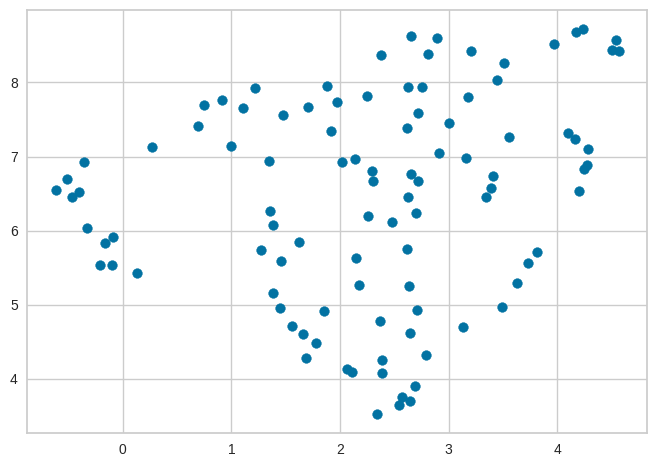

In [ ]:
df = x_scaled
plt.scatter(df[:,0],df[:,1])

In [ ]:
kmean = KMeans(n_clusters=3,random_state=116)
kmean.fit(df)
kmean.labels_

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0], dtype=int32)

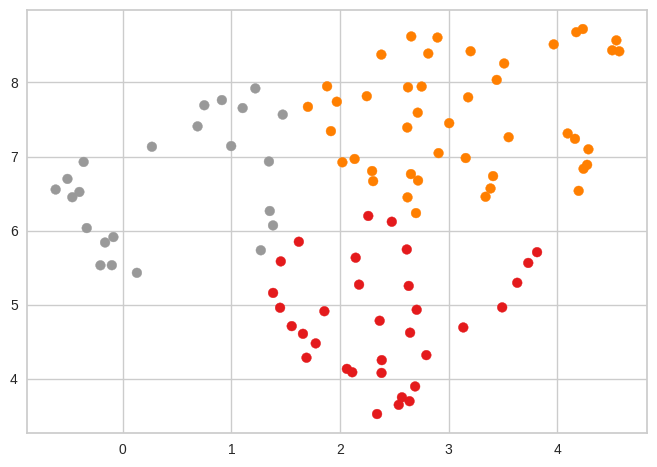

In [ ]:
plt.scatter(df[:,0],df[:,1],c=kmean.labels_,cmap='Set1')

In [ ]:
! pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(2,16),score_list,curve='convex',direction='decreasing')
kl.elbow

5

<h2> Hierarchical Clustering

Text(0, 0.5, 'Eucledian Distance')

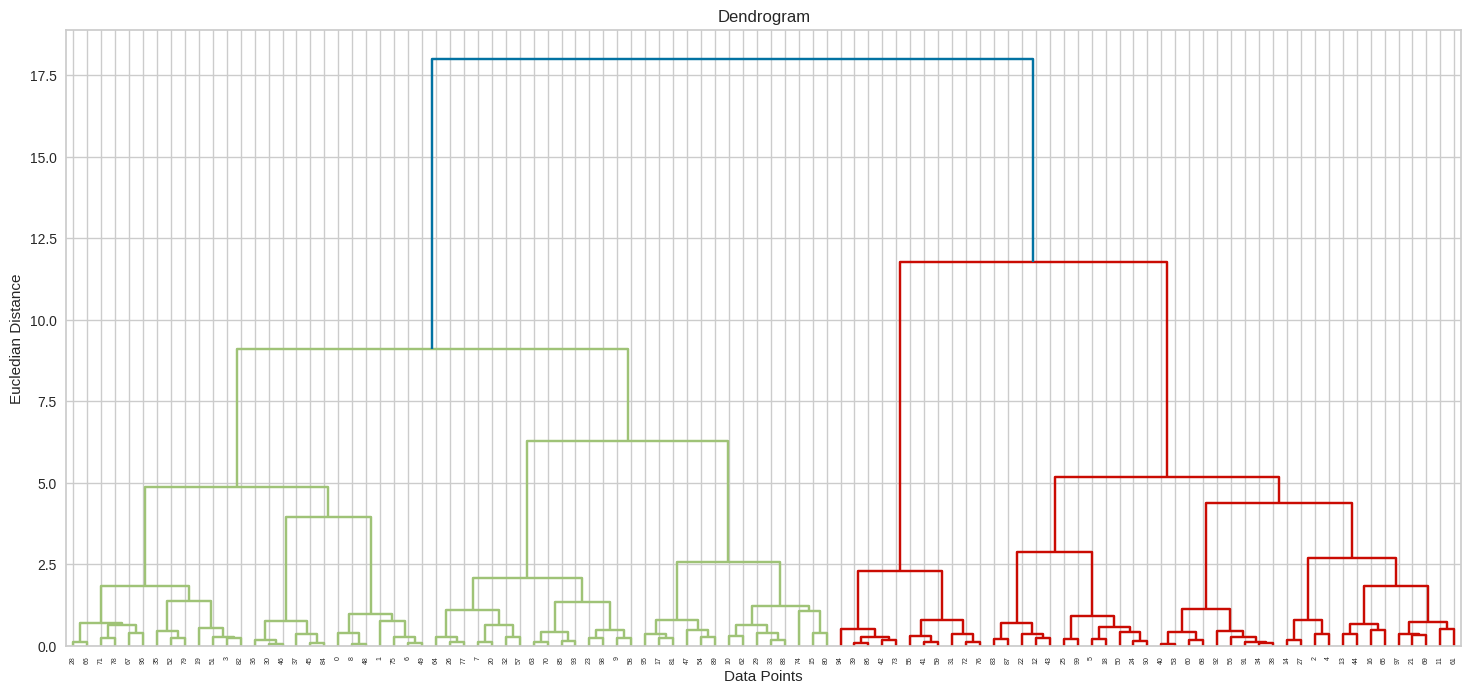

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(18,8))
dendrogram = sch.dendrogram(sch.linkage(x_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Eucledian Distance')

By seeing the dendrogram we can find 4 clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7]
hac_silhouette=[]
for n in n_clusters:
  agclustering = AgglomerativeClustering(n_clusters=n,affinity='euclidean',linkage='ward')
  agclustering.fit(x_scaled)
  hac_silhouette.append(silhouette_score(x_scaled,agclustering.labels_))
  print(f'clusters: {n},  Silhouette_score: {silhouette_score(x_scaled,agclustering.labels_)}')


clusters: 2,  Silhouette_score: 0.40507709980010986
clusters: 3,  Silhouette_score: 0.43515318632125854
clusters: 4,  Silhouette_score: 0.39087387919425964
clusters: 5,  Silhouette_score: 0.3763308823108673
clusters: 6,  Silhouette_score: 0.35849353671073914
clusters: 7,  Silhouette_score: 0.3836323022842407


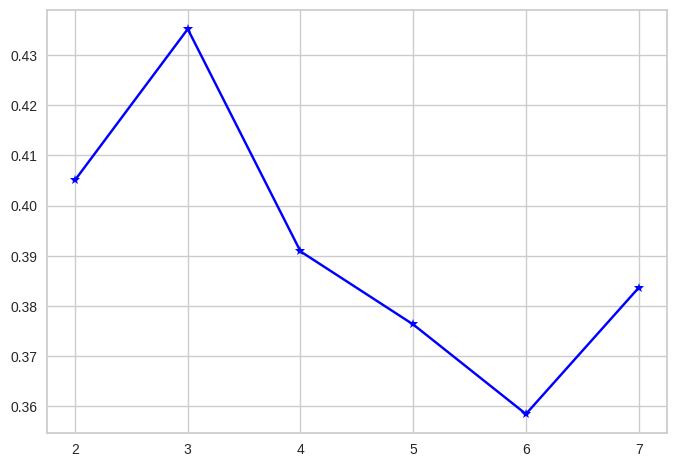

In [ ]:
plt.plot(n_clusters,hac_silhouette,color='blue',marker='*')

In [ ]:
agclustering = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
agclustering.fit(x_scaled)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [ ]:
silhouette_score(x_scaled,agclustering.labels_)

0.4351532

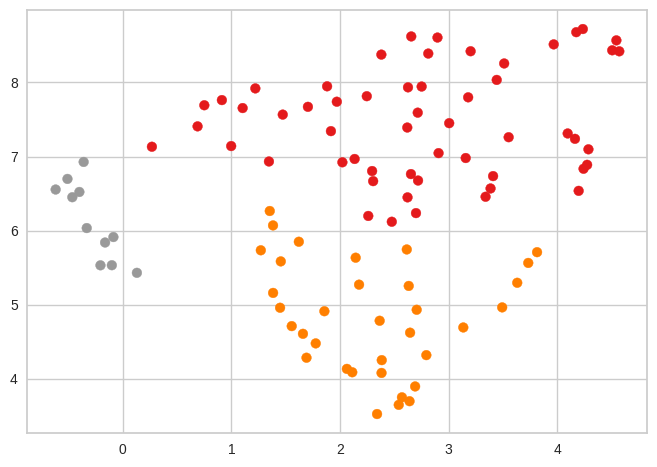

In [ ]:
plt.scatter(df[:,0],df[:,1],c=agclustering.labels_,cmap='Set1')

Hierarchical Clustering also suggest the Number of clusters to be 3.

<h2> DBScan Clustering

In [ ]:
from sklearn.cluster import DBSCAN
cluster_score = []
epss = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
min_sampless = range(5,10)
for i in epss:
  for j in min_sampless:
    clustering = DBSCAN(eps=i,min_samples=j)
    clustering.fit(x_scaled)
    if(len(set(clustering.labels_))>1):
      score = silhouette_score(x_scaled,clustering.labels_)
      cluster_score.append(score)
      print(f'eps:{i}, min_sample:{j}, clusters :{set(clustering.labels_)}, silhouette_score:{score}')

eps:0.3, min_sample:5, clusters :{0, 1, 2, -1}, silhouette_score:-0.1023615300655365
eps:0.4, min_sample:5, clusters :{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1}, silhouette_score:0.1796010136604309
eps:0.4, min_sample:6, clusters :{0, 1, -1}, silhouette_score:-0.11836849898099899
eps:0.5, min_sample:5, clusters :{0, 1, 2, 3, 4, 5, -1}, silhouette_score:0.2842400074005127
eps:0.5, min_sample:6, clusters :{0, 1, 2, 3, 4, 5, 6, 7, -1}, silhouette_score:0.27013498544692993
eps:0.5, min_sample:7, clusters :{0, 1, 2, 3, -1}, silhouette_score:-0.04800741747021675
eps:0.5, min_sample:8, clusters :{0, 1, -1}, silhouette_score:-0.11804233491420746
eps:0.5, min_sample:9, clusters :{0, -1}, silhouette_score:0.22176192700862885
eps:0.6, min_sample:5, clusters :{0, 1, -1}, silhouette_score:0.02701505646109581
eps:0.6, min_sample:6, clusters :{0, 1, 2, 3, -1}, silhouette_score:0.08299258351325989
eps:0.6, min_sample:7, clusters :{0, 1, 2, -1}, silhouette_score:0.27635782957077026
eps:0.6, min_sample:8, clust

In [ ]:
# lets go with silhouette score of 0.3028
clustering = DBSCAN(eps=0.7,min_samples=8)
clustering.fit(x_scaled)

DBSCAN(eps=0.7, min_samples=8)

In [ ]:
clustering.labels_

array([-1,  0, -1,  0, -1,  1,  0,  0, -1,  0,  0,  1,  0,  0, -1,  0,  0,
        0,  1,  0,  0,  1,  0,  0,  1,  0,  0, -1,  0,  0, -1,  2,  0,  0,
        1,  0, -1, -1,  1,  2,  1,  2,  2,  0,  0, -1, -1,  0, -1,  0,  1,
        0,  0,  1,  0,  2,  1,  0,  0,  2,  1,  1,  0,  0,  0,  0,  0,  0,
        1,  1,  0,  0,  2,  2, -1, -1,  2,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  2,  0,  0,  0,  1,  1,  1,  0,  2,  0,  0,  1,  0,  0])

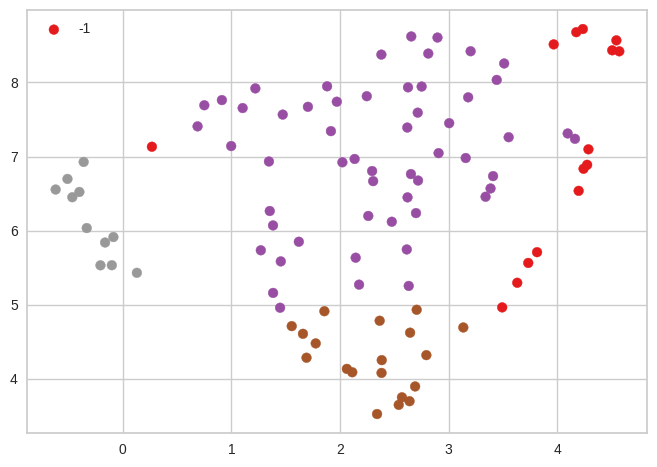

In [ ]:
plt.scatter(df[:,0],df[:,1],c=clustering.labels_,cmap='Set1')
plt.legend(clustering.labels_)
plt.show()

Here also we can find 3 clusters with some red points as outliers

In [ ]:
df_new1['labels'] = kmean.labels_

<h2> Recommendation of Restaurents:

In [ ]:
df_new1

,Name,Cost,Ice Cream,Mediterranean,North Indian,Biryani,Mughlai,Goan,Street Food,North Eastern,...,Spanish,American,Juices,Bakery,Rating,Reviews,Positive_rate,Negative_rate,Neutral_rate,labels
0,Beyond Flavours,800,0,0,1,0,0,0,0,0,...,0,0,0,0,4.280,752,82.0,12.0,6.0,1
1,Paradise,800,0,0,1,1,0,0,0,0,...,0,0,0,0,4.700,252,96.0,3.0,1.0,1
2,Flechazo,1300,0,1,1,0,0,0,0,0,...,0,0,0,0,4.660,667,91.0,6.0,3.0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,1,1,0,0,0,0,...,0,0,0,0,3.210,1433,53.0,35.0,12.0,1
4,Over The Moon Brew Company,1200,0,1,1,0,0,0,0,0,...,0,0,0,0,4.340,1831,87.0,7.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Desi Bytes,400,0,0,1,0,0,0,0,0,...,0,0,0,0,2.900,1499,42.0,43.0,15.0,1
96,Hyderabadi Daawat,600,0,0,0,0,1,0,0,0,...,0,0,0,0,3.830,4412,74.0,19.0,7.0,1
97,Zega - Sheraton Hyderabad Hotel,1750,0,0,0,0,0,0,0,0,...,0,0,0,0,4.450,2738,89.0,3.0,8.0,0
98,Triptify,400,0,0,1,0,0,0,0,0,...,0,0,0,0,3.550,1710,63.0,28.0,9.0,1


In [ ]:
df_recom = df_new1.copy()

In [ ]:
df_recom = df_recom.set_index('Name')
df_recom.head()

,Cost,Ice Cream,Mediterranean,North Indian,Biryani,Mughlai,Goan,Street Food,North Eastern,Chinese,...,Spanish,American,Juices,Bakery,Rating,Reviews,Positive_rate,Negative_rate,Neutral_rate,labels
Name,,,,,,,,,,,,,,,,,,,,,
Beyond Flavours,800,0,0,1,0,0,0,0,0,1,...,0,0,0,0,4.28,752,82.0,12.0,6.0,1
Paradise,800,0,0,1,1,0,0,0,0,1,...,0,0,0,0,4.70,252,96.0,3.0,1.0,1
Flechazo,1300,0,1,1,0,0,0,0,0,0,...,0,0,0,0,4.66,667,91.0,6.0,3.0,0
Shah Ghouse Hotel & Restaurant,800,0,0,1,1,0,0,0,0,1,...,0,0,0,0,3.21,1433,53.0,35.0,12.0,1
Over The Moon Brew Company,1200,0,1,1,0,0,0,0,0,1,...,0,0,0,0,4.34,1831,87.0,7.0,6.0,0


In [ ]:
df_recom.index

Index(['Beyond Flavours', 'Paradise', 'Flechazo',
       'Shah Ghouse Hotel & Restaurant', 'Over The Moon Brew Company',
       'The Fisherman's Wharf', 'eat.fit', 'Shah Ghouse Spl Shawarma',
       'Hyper Local', 'Cream Stone', 'Sardarji's Chaats & More',
       'Barbeque Nation', 'Absolute Sizzlers', 'The Lal Street - Bar Exchange',
       'AB's - Absolute Barbecues', 'KFC', 'NorFest - The Dhaba',
       'Hotel Zara Hi-Fi', '10 Downing Street', 'Pakwaan Grand', '13 Dhaba',
       'Jonathan's Kitchen - Holiday Inn Express & Suites', 'B-Dubs', 'Amul',
       'SKYHY', 'Tiki Shack', 'Mustang Terrace Lounge',
       '3B's - Buddies, Bar & Barbecue', 'Behrouz Biryani',
       'Hunger Maggi Point', 'Pot Pourri', 'Pista House',
       'Marsala Food Company', 'Club Rogue',
       'Mazzo - Marriott Executive Apartments', 'Green Bawarchi Restaurant',
       'Banana Leaf Multicuisine Restaurant', 'Kritunga Restaurant',
       'The Glass Onion', 'Deli 9 Bistro', 'Frio Bistro', 'Karachi Bakery',
 

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df_recom)

In [ ]:
df_recom = pd.DataFrame(x_scaled,index=df_recom.index)
df_recom.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
Name,,,,,,,,,,,,,,,,,,,,,
Beyond Flavours,0.358127,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.758065,0.078419,0.776119,0.161290,0.183284,0.5
Paradise,0.358127,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.927419,0.000000,0.985075,0.016129,0.000000,0.5
Flechazo,0.633609,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.911290,0.065088,0.910448,0.064516,0.073314,0.0
Shah Ghouse Hotel & Restaurant,0.358127,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.326613,0.185226,0.343284,0.532258,0.403226,0.5
Over The Moon Brew Company,0.578512,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.782258,0.247647,0.850746,0.080645,0.183284,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_score = cosine_similarity(df_recom)

In [ ]:
similarity_score.shape

(100, 100)

In [ ]:
def recommend(name):
  hotel_list=[]
  index = np.where(df_recom.index== name)[0][0]
  sorted_list = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]
  for i in sorted_list:
    hotel_list.append(df_recom.index[i[0]])
  return hotel_list

In [ ]:
recommend('Paradise')

['Biryanis And More',
 'Green Bawarchi Restaurant',
 'Hyderabad Chefs',
 'Olive Garden',
 'Being Hungry']

In [ ]:
df_new1.head()

,Name,Cost,Ice Cream,Mediterranean,North Indian,Biryani,Mughlai,Goan,Street Food,North Eastern,...,Spanish,American,Juices,Bakery,Rating,Reviews,Positive_rate,Negative_rate,Neutral_rate,labels
0,Beyond Flavours,800,0,0,1,0,0,0,0,0,...,0,0,0,0,4.28,752,82.0,12.0,6.0,1
1,Paradise,800,0,0,1,1,0,0,0,0,...,0,0,0,0,4.70,252,96.0,3.0,1.0,1
2,Flechazo,1300,0,1,1,0,0,0,0,0,...,0,0,0,0,4.66,667,91.0,6.0,3.0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,1,1,0,0,0,0,...,0,0,0,0,3.21,1433,53.0,35.0,12.0,1
4,Over The Moon Brew Company,1200,0,1,1,0,0,0,0,0,...,0,0,0,0,4.34,1831,87.0,7.0,6.0,0


In [ ]:
df_recom_list = df_new1[df_new1['Name']=='Behrouz Biryani']
for name in recommend('Behrouz Biryani'):
  df_recom_list = pd.concat([df_recom_list,df_new1[df_new1['Name'] == name]],axis=0)

In [ ]:
df_recom_list

,Name,Cost,Ice Cream,Mediterranean,North Indian,Biryani,Mughlai,Goan,Street Food,North Eastern,...,Spanish,American,Juices,Bakery,Rating,Reviews,Positive_rate,Negative_rate,Neutral_rate,labels
28,Behrouz Biryani,600,0,0,0,1,1,0,0,0,...,0,0,0,0,2.825,1597,43.0,47.0,10.0,1
66,Aromas@11SIX,750,0,0,1,1,1,0,0,0,...,0,0,0,0,3.460,2042,55.0,28.0,17.0,1
78,Khaan Saab,1100,0,0,1,0,1,0,0,0,...,0,0,0,0,3.800,1223,72.0,22.0,6.0,1
74,Faasos,600,0,0,0,1,0,0,0,0,...,0,0,0,0,3.030,4392,48.0,38.0,14.0,2
19,Pakwaan Grand,400,0,0,1,1,0,0,0,0,...,0,0,0,0,2.710,2064,34.0,46.0,20.0,1
71,Eat India Company,1300,0,0,1,0,1,0,0,0,...,0,0,0,0,3.260,2677,49.0,33.0,18.0,1
